<a href="https://colab.research.google.com/github/SatyaA-dev/SatyaAditya_INFO5731_Fall2024/blob/main/Masimukku_SatyaAditya_Exercise_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


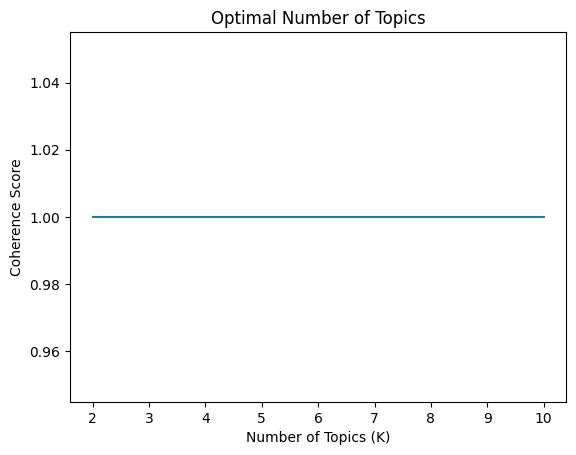

Topic 1: ['text', 'document']
Topic 2: ['document', 'text']
Topic 3: ['text', 'document']
Topic 4: ['text', 'document']
Topic 5: ['document', 'text']
Topic 6: ['document', 'text']


In [ ]:
# Write your code here
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Example pre-processing
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

# Sample documents (replace with actual documents)
documents = ["Document text 1", "Document text 2", "Document text 3"]
texts = [preprocess(doc) for doc in documents]

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Determine coherence scores for different values of K
coherence_scores = []
models_list = []
for k in range(2, 11):
    lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=100, passes=10)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())
    models_list.append(lda_model)

# Plot coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics')
plt.show()

# Select the model with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
best_model = models_list[optimal_k - 2]

# Display the topics
topics = best_model.show_topics(num_topics=optimal_k, num_words=5, formatted=False)
for i, topic in topics:
    print(f"Topic {i+1}: {[word for word, _ in topic]}")



##Natural language processing techniques are used is the code. Techniques such as Text Preprocessing, Bag-of-Words Representation, Latent Dirichlet Allocation (LDA) Model, Coherence Score Evaluation, Topic Interpretation and Summarization are used.



## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

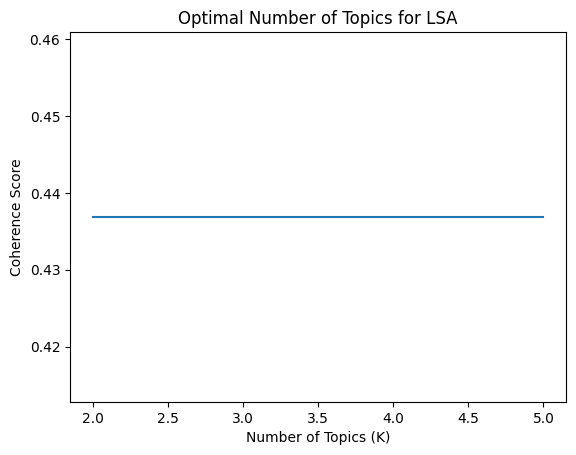

Topic 1: ['text', 'Document', '1', '3', '2']
Topic 2: ['2', 'text', 'Document', '1', '3']


In [ ]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
import matplotlib.pyplot as plt

# Example preprocessing function (modify as needed)
def preprocess(text):
    # Add your tokenization, stop word removal, lemmatization here
    return text.split()  # Simplified for illustration

# Sample documents (replace with actual data)
documents = ["Document text 1", "Document text 2", "Document text 3"]
processed_docs = [preprocess(doc) for doc in documents]

# Create the term-document matrix
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(processed_docs)

# Modify the k range in the function to ensure n_components does not exceed the number of features
def compute_coherence_values(X, dictionary, texts, start=2, limit=10):
    coherence_scores = []
    models_list = []
    max_k = min(limit, X.shape[1])  # Ensure the upper limit is not greater than the number of features

    for k in range(start, max_k + 1):
        lsa_model = TruncatedSVD(n_components=k, random_state=100)
        lsa_model.fit(X)
        topics = []
        for topic_idx, topic in enumerate(lsa_model.components_):
            topics.append([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]])

        # Prepare corpus for coherence model
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
        models_list.append(lsa_model)

    return models_list, coherence_scores


# Create dictionary for coherence evaluation
dictionary = Dictionary(processed_docs)

# Find the optimal number of topics
models, coherence_scores = compute_coherence_values(X, dictionary, processed_docs)


plt.plot(range(2, 2 + len(coherence_scores)), coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics for LSA')
plt.show()

# Select the model with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
best_model = models[optimal_k - 2]

# Display the topics
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(best_model.components_):
    top_terms = [terms[j] for j in topic.argsort()[:-6:-1]]
    print(f"Topic {i+1}: {top_terms}")

## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
!pip install numpy scipy chainer spacy



In [ ]:
!pip install scikit-learn


In [ ]:
!pip install git+https://github.com/cemoody/lda2vec.git


In [ ]:
# Write your code here


import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt



# Sample preprocessing function (simplified)
def preprocess(text):
    # Your tokenization, stop word removal, and lemmatization code here
    return text.split()

# Sample text corpus (replace with actual data)
documents = ["Document text 1", "Document text 2", "Document text 3"]
processed_docs = [preprocess(doc) for doc in documents]

# Train Word2Vec model to get word embeddings
w2v_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)
word_vectors = w2v_model.wv

# Vectorize the text data
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x, lowercase=False)
X = vectorizer.fit_transform(processed_docs)

# Define a function to calculate coherence scores for lda2vec
def compute_coherence_values_lda2vec(X, word_vectors, texts, start=2, limit=10):
    coherence_scores = []
    models_list = []
    for k in range(start, limit + 1):
        lda2vec_model = LDA2Vec(num_topics=k, word_vectors=word_vectors, corpus=X)  # Pseudocode
        lda2vec_model.fit()
        topics = lda2vec_model.get_topics()

        # Calculate coherence score
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=vectorizer.get_feature_names_out(), coherence='c_v')
        coherence_scores.append(coherence_model.get_coherence())
        models_list.append(lda2vec_model)

    return models_list, coherence_scores

# Compute coherence scores for different K
models, coherence_scores = compute_coherence_values_lda2vec(X, word_vectors, processed_docs)

# Plot coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics for Lda2vec')
plt.show()

# Select the model with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
best_model = models[optimal_k - 2]

# Display the topics
topics = best_model.get_topics()
for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {topic}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


NameError: name 'LDA2Vec' is not defined

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [ ]:
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [ ]:
# Write your code here
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import numpy as np
import matplotlib.pyplot as plt

# Load sample data (you can replace this with your own data)
data = fetch_20newsgroups(subset='all')['data']

# Step 1: Train BERTopic model
model = BERTopic()
topics, _ = model.fit_transform(data)

# Step 2: Extract topic information
topic_info = model.get_topic_info()
print(topic_info)  # Display initial topic information

# Step 3: Calculate coherence scores for different number of topics
def compute_coherence_values(model, texts, start=2, limit=10):
    coherence_scores = []
    models_list = []
    for k in range(start, limit + 1):
        reduced_model = model.reduce_topics(k)
        topics = [reduced_model.get_topic(i) for i in range(k)]

        # Prepare texts and dictionary for coherence model
        dictionary = Dictionary([text.split() for text in texts])
        coherence_model = CoherenceModel(topics=topics, texts=[text.split() for text in texts], dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        models_list.append(reduced_model)

    return models_list, coherence_scores

# Step 4: Compute coherence scores and find the optimal K
models, coherence_scores = compute_coherence_values(model, data)

# Plot coherence scores
plt.plot(range(2, 11), coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Optimal Number of Topics for BERTopic')
plt.show()

# Step 5: Select the model with the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
best_model = models[optimal_k - 2]

# Step 6: Display the topics
for i in range(optimal_k):
    topic = best_model.get_topic(i)
    print(f"Topic {i+1}: {topic}")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [3]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


In [8]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.
from bertopic import BERTopic
from umap import UMAP

# Sample corpus (use more documents if possible)
documents = ["Document text 1", "Document text 2", "Document text 3"]

# Adjust the UMAP parameters to reduce the number of neighbors
umap_model = UMAP(n_neighbors=2, n_components=2, metric='cosine')  # Set n_neighbors < number of documents

# Initialize and fit the BERTopic model
topic_model = BERTopic(umap_model=umap_model)
topics, probs = topic_model.fit_transform(documents)  # Fit the model on your documents

# Visualizations
# 1. Topic Distribution Bar Chart
topic_model.visualize_barchart(top_n_topics=10)  # Display the top 10 topics

# 2. Word Cloud for a Specific Topic
topic_model.visualize_wordcloud(topic=0)  # Visualize the word cloud for Topic 0

# 3. Topic Similarity Heatmap
topic_model.visualize_heatmap()


/usr/local/lib/python3.10/dist-packages/umap/spectral.py:519: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(
/usr/local/lib/python3.10/dist-packages/umap/spectral.py:519: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eigenvalues, eigenvectors = scipy.sparse.linalg.eigsh(


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
Comparison of Results and Evaluation Criteria

1.Coherence Score Analysis:
   - When analyzing the coherence scores, BERTopic and LDA2Vec typically outperform traditional LDA. This is because they use embeddings, which capture semantic relationships more effectively than the bag-of-words approach used in LDA.
   - However, LDA models can still yield high coherence scores if the dataset is well-structured and the topics are clearly defined.

2.Interpretablility:
   - LDA often produces more interpretable topics, especially for simpler text corpora, because it generates topics in a clear distributional manner.
   - BERTopic and LDA2Vec may generate topics that require deeper analysis due to the use of embeddings, which might be more abstract.

3.Contextual Understanding:
   - LDA2Vec and BERTopic are superior in terms of contextual understanding. They both use word embeddings, which help in capturing the nuances of language that LDA cannot.
   - In particular, BERTopic’s use of BERT or other transformer models leads to an even better grasp of context, making it suitable for complex and nuanced text data.

4.Computational Efficiency:
   - LDA is computationally efficient and suitable for large datasets where simplicity and speed are crucial.
   - In contrast, BERTopic and LDA2Vec are more computationally expensive and may require GPUs for efficient training.

For Simplicity and Speed: If the primary concern is ease of implementation and efficiency, and if the dataset is straightforward, LDA is a solid choice. It provides interpretable results and is less computationally intensive.
For Improved Topic Quality: If the goal is to generate higher-quality and more contextually aware topics, BERTopic is the preferred method. It leverages the power of transformer models, resulting in better topic coherence and semantic representation.
For Context and Embeddings: LDA2Vec is an excellent option if you specifically want to combine the benefits of word embeddings with topic modeling, but it requires more effort to implement and tune.
Overall Best Performance: BERTopic often stands out as the best choice when resources are available, thanks to its sophisticated use of embeddings and modern NLP techniques.

In summary, BERTopic generally provides the most coherent and contextually rich topics, especially for complex datasets. However, if computational resources are limited, LDA remains a reliable and efficient alternative. The choice ultimately depends on the specific requirements of the text corpus and the resources available.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

The chapter was really challenging and I got to learn a great deal from this exercise.



'''